# Scikit-Learn Jupyer Notebook
*****
***

## Overview of the scikit-learn library
******


Scikit Learn is a Python library for machine learning, consisting of learning algorithms for machine learning and statistical modeling. The library was was initially developed by David Cournapeau in 2007 before being further developed by the FIRCA (French Institute for Research in Computer Science and Automation) leading to its first public realesae in 2010. https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htmScikit. It's popularity of use is largely due to ease of use, being open sourse, portable, powerful and wide ranging content and relative flexibility for use in Machine Learning projects. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab 

<br>

Scikit-Learn's purpose is data modellying and is easily integrated with other packages to provide data handling, manipulation and visualisation. It is built upon Python packages which include Numpy, SciPy Matplotlib. Pandas and Sci Py. The library provides methods of supervised and unsupervised learning algorithms including regression, classification and clustering of data. The library also offers other functions including ensemble methods, feature manipulation, outlier detection and model selection and validation. https://towardsdatascience.com/an-introduction-to-scikit-learn-the-gold-standard-of-python-machine-learning-e2b9238a98ab

### Defining Learning Problems with Scikit-Learn
***

The focus of machine learning is "acquiring skills or knowledge from experience"https://machinelearningmastery.com/types-of-learning-in-machine-learning/. Within the field itslef, there are many subfileds of study. The focus of this assessment is two main learning problems with Scikit-Learn. These are supervised and unsupervised learning.
<br>
<br>
**Supervised learning** occurs when the data"comes with additinal attributes tht we want to predict"https://scikit-learn.org/stable/tutorial/basic/tutorial.html. The main aim is to assess and predict correlations of real world phenonema. The input and output are specified in this type of learning https://searchenterpriseai.techtarget.com/definition/machine-learning-ML
<br>
<br>
**Unsupervised learning** involves algorithms "consists of a set of input vectors x without any corresponding target values.... goal in such problems may be to discover groups of similiar examples within the data or to determine the distribution of data" https://scikit-learn.org/stable/tutorial/basic/tutorial.html .he data and the recommendations generated from the algorithms are pre determined. https://searchenterpriseai.techtarget.com/definition/machine-learning-ML

## Palmer Penguin Set: Importing the Dataset and Initial Analysis
***

### Importing packages
<br>

The Scikit-Learn package is built upon SciPy (Scientific Python) that most be installed beforehand https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/c2. SciPy packages that will be used in this notebook are: 
- Numpy
 <br>
- Seaborn
 <br>
- Matplotlib
 <br>
- Pandas

In [1]:
import pandas as pd # numerical arrarys
import numpy as np # data frames
import matplotlib.pyplot as plt # plotting
import seaborn as sns # statistical plots
import sklearn.linear_model as ln # Logistic Regression
import sklearn.neighbors as nei # K nearest neighbours
import sklearn.model_selection as mod # helper functions

In [2]:
# Standard plot size.
plt.rcParams['figure.figsize'] = (15, 10)

# Standard colour scheme.
plt.style.use('ggplot')

### Importing the Dataset

The Palmer Penguin dataset will be used in this project.https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1?select=penguins_size.csv. In this section, the dataset is exploered at a higher level to establish any initial observations determine the scikit-learn packages that will be used and if there are any issues with the data that need to be resolved.

In [4]:
df = pd.read_csv("penguins_size.csv") # reading in the dataset

### Exploratory Data Analysis
The below functions look at samples from the dataset, its composition and whether or not any datapoints are missing.  

In [5]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [6]:
print (df.shape)

(344, 7)


Text(0, 0.5, 'Body Mass')

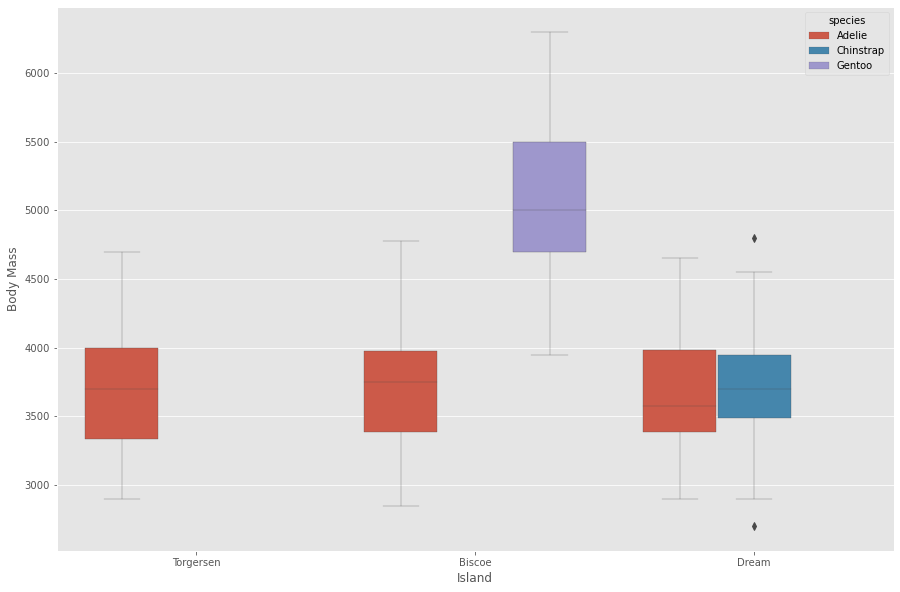

In [8]:
g = sns.boxplot(x = 'island',
            y ='body_mass_g',
            hue = 'species',
            data = df,
            linewidth=0.3)
g.set_xlabel('Island')
g.set_ylabel('Body Mass')

Note: 
<br>
Learning problems fall into a few categories:

supervised learning, in which the data comes with additional attributes that we want to predict (Click here to go to the scikit-learn supervised learning page).This problem can be either:

classification: samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data. An example of a classification problem would be handwritten digit recognition, in which the aim is to assign each input vector to one of a finite number of discrete categories. Another way to think of classification is as a discrete (as opposed to continuous) form of supervised learning where one has a limited number of categories and for each of the n samples provided, one is to try to label them with the correct category or class.

regression: if the desired output consists of one or more continuous variables, then the task is called regression. An example of a regression problem would be the prediction of the length of a salmon as a function of its age and weight.

unsupervised learning, in which the training data consists of a set of input vectors x without any corresponding target values. The goal in such problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine the distribution of data within the input space, known as density estimation, or to project the data from a high-dimensional space down to two or three dimensions for the purpose of visualization (Click here to go to the Scikit-Learn unsupervised learning page). (3)

### Scikit-Learn Algorithms

For this assignment, the notebook focuses on the following areas:
<br>
 - Linear Models:
<br>
 - Support Vector Machines
<br> 
 - Nearest Neighbours

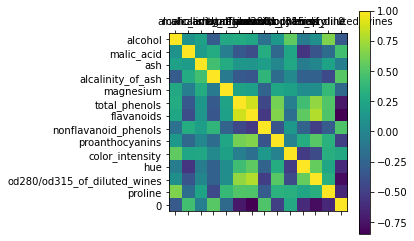

In [16]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

In [17]:
df.describe() # important in prediction of the class later on

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [18]:
df.describe().style.format("{:.5f}") # format call to give better overview

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,0
count,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000,178.00000
mean,13.00062,2.33635,2.36652,19.49494,99.74157,2.29511,2.02927,0.36185,1.59090,5.05809,0.95745,2.61169,746.89326,0.93820
std,0.81183,1.11715,0.27434,3.33956,14.28248,0.62585,0.99886,0.12445,0.57236,2.31829,0.22857,0.70999,314.90747,0.77503
min,11.03000,0.74000,1.36000,10.60000,70.00000,0.98000,0.34000,0.13000,0.41000,1.28000,0.48000,1.27000,278.00000,0.00000
25%,12.36250,1.60250,2.21000,17.20000,88.00000,1.74250,1.20500,0.27000,1.25000,3.22000,0.78250,1.93750,500.50000,0.00000
50%,13.05000,1.86500,2.36000,19.50000,98.00000,2.35500,2.13500,0.34000,1.55500,4.69000,0.96500,2.78000,673.50000,1.00000
75%,13.67750,3.08250,2.55750,21.50000,107.00000,2.80000,2.87500,0.43750,1.95000,6.20000,1.12000,3.17000,985.00000,2.00000
max,14.83000,5.80000,3.23000,30.00000,162.00000,3.88000,5.08000,0.66000,3.58000,13.00000,1.71000,4.00000,1680.00000,2.00000


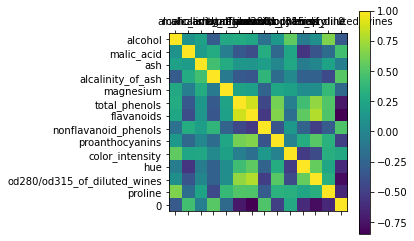

In [19]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns)
plt.yticks(range(len(df.columns)), df.columns)
plt.colorbar()
plt.show()

no strong correlations between features

### Support Vector Machines

In [20]:
pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

In [21]:
from sklearn.datasets import load_iris

data = load_iris()

df = pd.DataFrame(data.data,columns=data.feature_names)

df['target'] = pd.Series(data.target)

In [22]:
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [23]:
def get_data(dataset):

    data = dataset

    df = pd.DataFrame(data.data,columns=data.feature_names)

    df['target'] = pd.Series(data.target)

    print(df.head())

In [24]:
get_data(load_iris())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [25]:
from sklearn.datasets import load_iris, load_boston

get_data(load_boston())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  target  
0     15.3  396.90   4.98    24.0  
1     17.8  396.90   9.14    21.6  
2     17.8  392.83   4.03    34.7  
3     18.7  394.63   2.94    33.4  
4     18.7  396.90   5.33    36.2  


Linear Regression

In [26]:
from sklearn.datasets import load_wine

In [27]:
wine_data = load_wine()

In [28]:
dir(wine_data)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

## References

(1) https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
<br>
(2) https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/
<br>
(3) https://scikit-learn.org/stable/tutorial/basic/tutorial.html

<br>
Wine Dataset - P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

In [2]:
import pingouin as pg # https://pingouin-stats.org/generated/pingouin.pairwise_gameshowell.html#pingouin.pairwise_gameshowell
df = pg.read_dataset('penguins')
pg.pairwise_gameshowell(data=df, dv='body_mass_g',
                        between='species').round(3)

,A,B,mean(A),mean(B),diff,se,T,df,pval,hedges
0,Adelie,Chinstrap,3700.662,3733.088,-32.426,59.706,-0.543,152.455,0.834,-0.079
1,Adelie,Gentoo,3700.662,5076.016,-1375.354,58.811,-23.386,249.643,0.001,-2.833
2,Chinstrap,Gentoo,3733.088,5076.016,-1342.928,65.103,-20.628,170.404,0.001,-3.105


# End

*******